## Speedtest import workflow
### Follow steps to import global data, extract AUS, check unique (line count) and save locally and figshare
Created: Richard Ferrers, 18/11/22 CC_BY

In [1]:
# https://github.com/teamookla/ookla-open-data/blob/master/tutorials/aggregate_by_county_py.ipynb
# Speedtest Jupyter Notebook - demonstration code
# Pandas cheatsheet - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# https://colab.research.google.com/drivespeedtest/.../geopandas.ipynb
%matplotlib inline
# !pip install geopandas
# !pip install shapely
# !pip install rtree
# !apt-get install -y libspatialindex-dev
from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
# from adjustText import adjust_text - this library not loaded

In [2]:
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_fixed_tiles.zip"
    return url

#speedtest import data from aws

In [3]:
tile_url = get_tile_url("fixed", 2023, 2)
tile_url
#let's load Q2, Q3 22 data

'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2023/quarter%3D2/2023-04-01_performance_fixed_tiles.zip'

In [4]:
print (datetime.now())
# tells me how long takes to import data

2024-02-15 14:19:09.850542


In [5]:
tiles = gp.read_file(tile_url)
# load times - 30 mins (Sun pm), 8 mins (Mon am), 12mins (Sun pm), 11mins (Sat pm)
# load time -  12 mins (Fri am), 14 mins (Fri am)
# load time - 6 mins, (Fri pm),  6 mins (Fri pm) (now at 100Mbps, was 50Mbps)
# load time - x mins (Fri pm) (on 100Mbps NBN)
# load time - 7 mins (Th pm) (on 1Gbps Monash LAN)

In [6]:
print (datetime.now())

2024-02-15 14:26:06.181406


In [7]:
len(tiles)
# Q1 21 - 6.3M lines
# Q2 21 - 6.7M lines (global)
# Q3 21 - 6.9M lines
# Q4 21 - 6.7M lines (AU 86115 lines)
# Q1 22 - 6.7M lines (AU 88182 lines)
# Q2 22 - 6.6M lines (AU 86704 lines)
# Q3 22 - 6.609M lines (AU 83458 lines)
# Q1 23 - 6.334M lines (AU 89619 lines)
# Q2 23 - 6.370M lines (AU 90258 lines)
# Q3 23 - 6.67M lines (AU 90249 lines)

# how to save/load
#au_tiles.to_file("speedtest-AUS-Q221.geojson", driver='GeoJSON')
#working - reloaded successfully
# au2_tiles = gp.read_file("speedtest.geojson")

6370328

In [8]:
# au_tiles = tiles.cx[113.338953:153.569469 ,	-43.634597:-10.668186]
nz_tiles = tiles.cx[166.509144322:178.517093541 ,	-46.641235447:-34.4506617165]
#LAX = tiles.cx[-118:-120, 33:35]
#len(au_tiles) 
len(nz_tiles)
# processing World data to Australia subset by bounding box
# source of Bounding Box - World data set
# processing time - 5 mins, 9 mins, <1min (M2)

21113

In [9]:
# au_tiles.to_file("speedtest-AUS-Q323.geojson", driver='GeoJSON')
nz_tiles.to_file("speedtest-NZ-Q323.geojson", driver='GeoJSON')

#write to disk
# then load to figshare: CC-BY-NC https://doi.org/10.6084/m9.figshare.13370504 (Currently at.v22)

/var/folders/0s/qxd9z2qd38lc_8yjl3wf1qjm36znn7/T/ipykernel_78328/3189403894.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nz_tiles.centroid.plot()


<Axes: >

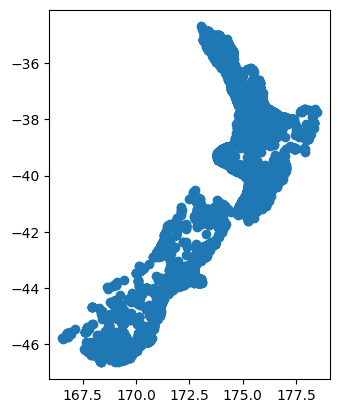

In [10]:
#au_tiles.centroid.plot()
nz_tiles.centroid.plot()
# Visual data inspection
# Q222 - looks like some E.Timor data or Coral Sea (New Guinea?)

In [11]:
#au_tiles['avg_d_kbps'].mean()
nz_tiles['avg_d_kbps'].mean()
# Q2 21 - 52314
# Q3 21 - 54854
# Q4 21 - 57645
# Q1 22 - 56873
# Q2 22 - 58442
# Q3 22 - 61658
# Q1 23 - 69696
# Q2 23 - 74254
# Q3 23 - 79082
#NZ-Q3 23 - 154335


154335.73504475915

In [12]:
#au_tiles.describe()
nz_tiles.describe()

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
count,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000
mean,154335.735045,81342.726188,22.559276,10.336523,3.449723
std,120492.670837,83412.241558,45.567639,20.629109,5.245286
min,73.000000,13.000000,1.000000,1.000000,1.000000
25%,48847.000000,14325.000000,7.000000,1.000000,1.000000
50%,140562.000000,58306.000000,12.000000,4.000000,2.000000
75%,230402.000000,124754.000000,27.000000,11.000000,4.000000
max,899562.000000,658505.000000,1920.000000,791.000000,192.000000


In [17]:
# to do - post to Figshare DONE.
# plot AUS line histogram.
au_tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
6553220,3101033321313133,5078,1604,17,1,1,"POLYGON ((123.04138 -10.71998, 123.04688 -10.7..."
6553221,3101033321331111,14622,14495,6,6,1,"POLYGON ((123.04138 -10.74697, 123.04688 -10.7..."
6553222,3101033321331132,28031,7409,8,1,1,"POLYGON ((123.03589 -10.76316, 123.04138 -10.7..."
6553223,3101033321331303,36466,8536,5,3,1,"POLYGON ((123.03040 -10.77395, 123.03589 -10.7..."
6553224,3101033321332130,18230,10074,5,2,1,"POLYGON ((122.99194 -10.80093, 122.99744 -10.8..."
...,...,...,...,...,...,...,...
6660886,3130102100030011,11108,497,268,15,1,"POLYGON ((147.76062 -43.13306, 147.76611 -43.1..."
6660887,3130102100102231,69268,4745,37,3,1,"POLYGON ((147.84851 -43.12504, 147.85400 -43.1..."
6660888,3130102100102323,140487,11970,50,2,1,"POLYGON ((147.85950 -43.12905, 147.86499 -43.1..."
6660889,3130102100120013,44510,7855,37,3,1,"POLYGON ((147.84851 -43.13707, 147.85400 -43.1..."


/Users/rf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


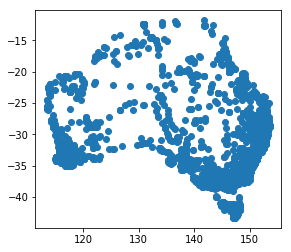

In [32]:
au_tiles.loc[au_tiles['avg_d_kbps'] > 200000].centroid.plot()

In [18]:
au_tiles.loc[au_tiles['avg_d_kbps'] >200000]
#Q2 23 - records over 200Mbps - 3514
#Q2 23 - records over 200Mbps - 3948 (up 15%)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
6554481,3101213323133200,238820,14816,84,3,2,"POLYGON ((123.00293 -16.44662, 123.00842 -16.4..."
6554482,3101213323133202,206423,23215,99,1,1,"POLYGON ((123.00293 -16.45189, 123.00842 -16.4..."
6554485,3101213323303002,265139,19143,110,2,2,"POLYGON ((122.91504 -16.51510, 122.92053 -16.5..."
6554488,3101222322213112,226467,10941,127,1,1,"POLYGON ((114.07104 -21.82581, 114.07654 -21.8..."
6554489,3101222322230200,220395,20808,30,1,1,"POLYGON ((113.99414 -21.88189, 113.99963 -21.8..."
...,...,...,...,...,...,...,...
6660838,3130102010321311,233510,19542,63,2,1,"POLYGON ((147.21130 -43.27721, 147.21680 -43.2..."
6660843,3130102010332301,286693,21981,49,2,2,"POLYGON ((147.24426 -43.30919, 147.24976 -43.3..."
6660870,3130102013002133,268345,7509,54,1,1,"POLYGON ((147.34314 -43.36912, 147.34863 -43.3..."
6660878,3130102100003203,247079,15638,50,1,1,"POLYGON ((147.70569 -43.12103, 147.71118 -43.1..."


In [19]:
au_tiles.loc[au_tiles['avg_d_kbps'] <10000]
#Q2 23 - records less 10Mbps - 3144
#Q2 23 - records less 10Mbps - 2896 (down 8%)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
6553220,3101033321313133,5078,1604,17,1,1,"POLYGON ((123.04138 -10.71998, 123.04688 -10.7..."
6553226,3101033323012310,1786,3363,7,7,3,"POLYGON ((122.81616 -10.89804, 122.82166 -10.8..."
6554502,3101222322323122,5672,629,561,4,1,"POLYGON ((114.14795 -21.91757, 114.15344 -21.9..."
6554514,3101222332131121,4859,4336,141,2,2,"POLYGON ((114.94446 -21.70847, 114.94995 -21.7..."
6554526,3101222333211003,5346,5186,46,3,3,"POLYGON ((115.09827 -21.78501, 115.10376 -21.7..."
...,...,...,...,...,...,...,...
6660825,3130102010302330,6380,9193,35,1,1,"POLYGON ((147.16187 -43.25320, 147.16736 -43.2..."
6660835,3130102010320103,6993,602,27,1,1,"POLYGON ((147.15637 -43.26521, 147.16187 -43.2..."
6660854,3130102012022011,2049,812,64,2,2,"POLYGON ((146.96960 -43.42101, 146.97510 -43.4..."
6660860,3130102012110230,1873,1806,55,1,1,"POLYGON ((147.22778 -43.34915, 147.23328 -43.3..."


/Users/rf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


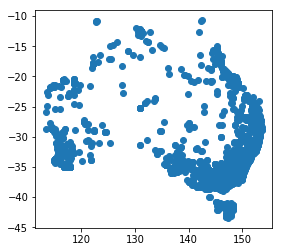

In [38]:
au_tiles.loc[au_tiles['avg_d_kbps'] <10000].centroid.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8479e24940>]],
      dtype=object)

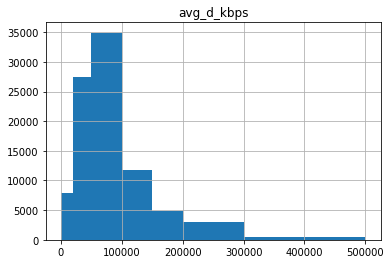

In [52]:
#df.hist(column='session_duration_seconds', bins=25, bins=[0,.5,.75,1]))
au_tiles.hist(column='avg_d_kbps', bins=[0,20000, 50000, 100000, 150000, 200000, 300000, 500000])